# cropping images

this notebook tries to explore several ways to crop the images. the main goal is to remove the black borders and resize the images to a common shape. As example data, `sample.zip` from the kaggle dataset is used. 

Some people have already dealt with this:
- https://jeffreydf.github.io/diabetic-retinopathy-detection#the-opening


In [6]:
import numpy as np
from pathlib import Path
from glob import glob

sample_path = Path("/projects/steinbac/adversarial_medical_imaging/dr/kaggle/sample/")
ipaths = [item for item in sample_path.glob("*jpeg")]
print(len(ipaths),"images loaded")


10 images loaded


In [7]:
import matplotlib.pyplot as plt
import skimage

In [8]:
print(skimage.__version__,np.__version__)
from skimage.io import imread
imgs = [skimage.io.imread(img) for img in ipaths]



0.15.0 1.15.0


(2592, 3888, 3) uint8 



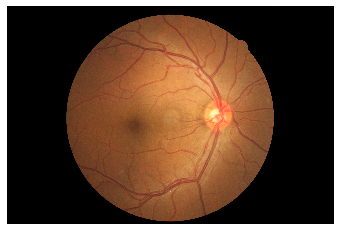

(3264, 4928, 3) uint8 



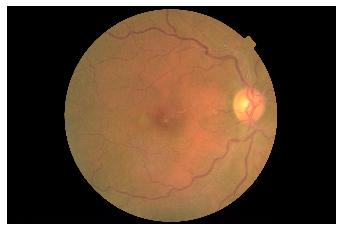

(3168, 4752, 3) uint8 



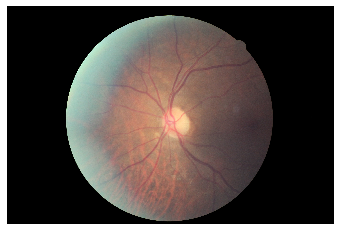

(2592, 3888, 3) uint8 



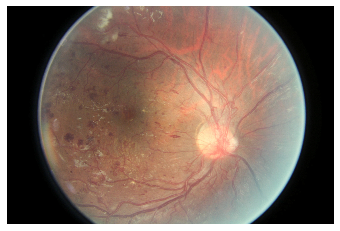

(1944, 2592, 3) uint8 



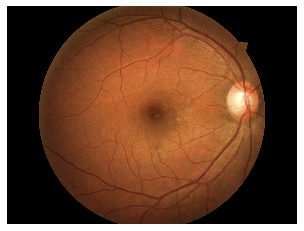

(3168, 4752, 3) uint8 



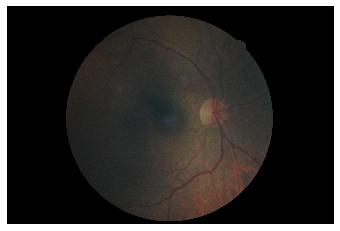

(2592, 3888, 3) uint8 



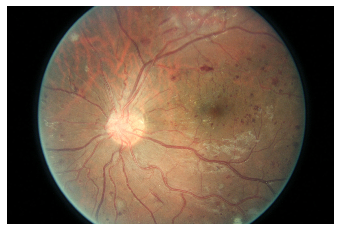

(2592, 3888, 3) uint8 



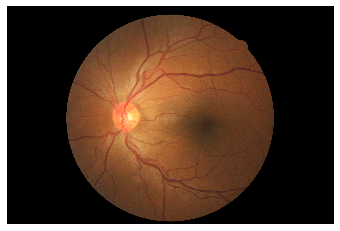

(1944, 2592, 3) uint8 



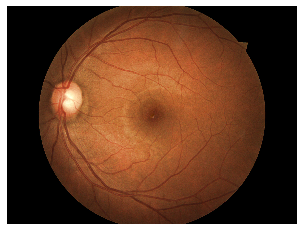

(3264, 4928, 3) uint8 



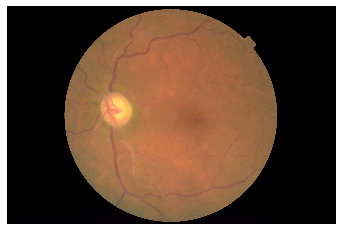

In [9]:
for i in imgs:
    print(i.shape,i.dtype,"\n")

    plt.figure()
    ipl = plt.imshow(i)
    ipl.set_cmap('hot')
    plt.axis('off')
    plt.show()

(2592, 3888) float64 



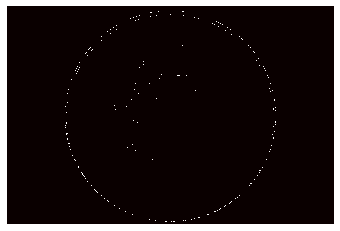

[1252.8 1252.8 1252.8] 1252.8000000000002
circle in x (2592, 689, 3195, (7096,))
circle in y (3888, 56, 2562, (7096,))


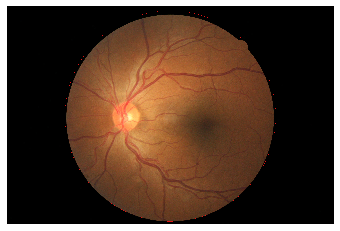

(1944, 2592) float64 



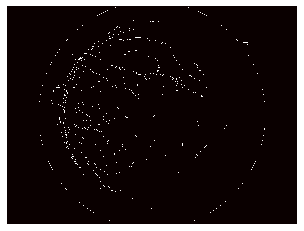

[810. 810. 810.] 810.0
circle in x (1944, 511, 2131, (4592,))
circle in y (2592, 185, 1805, (4592,))


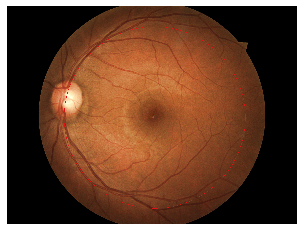

(3264, 4928) float64 



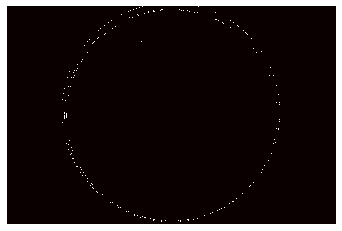

[1577.6 1577.6 1577.6] 1577.6
circle in x (3264, 892, 4048, (8936,))
circle in y (4928, 59, 3215, (8936,))


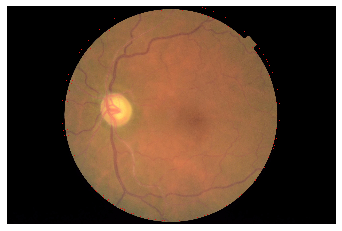

In [18]:
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.color import rgb2gray
import math

for i in imgs[-3:]:
    
    
    flat = rgb2gray(i)
    print(flat.shape,flat.dtype,"\n")
    
    edges = canny(flat)
    plt.figure()
    ipl = plt.imshow(edges)
    ipl.set_cmap('hot')
    plt.axis('off')
    plt.show()
    
    sm_dim = min(flat.shape)/2.
    hough_radii = np.linspace(.7*sm_dim, 1.1*sm_dim, 10)
    #print(hough_radii)
    hough_res = hough_circle(edges, hough_radii)

    # Select the most prominent 5 circles
    accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                               total_num_peaks=3)
 
    index = np.argmax(radii)
    print(radii,radii[index])
    
    circy, circx = circle_perimeter(int(round(cy[index])), 
                                    int(round(cx[index])), 
                                    int(round(radii[index])),
                                   shape=flat.shape)
    print(f"circle in x {flat.shape[0],min(circx),max(circx),circx.shape}")
    print(f"circle in y {flat.shape[1],min(circy),max(circy),circy.shape}")
    
    i[circy,circx] = (220, 20, 20)
    
    plt.figure()
    ipl = plt.imshow(i)
    ipl.set_cmap('hot')
    plt.axis('off')
    plt.show()
    
    

(2592, 3888) float64 



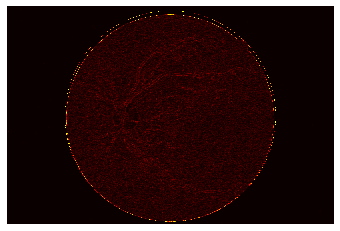

(2592, 3888) float64


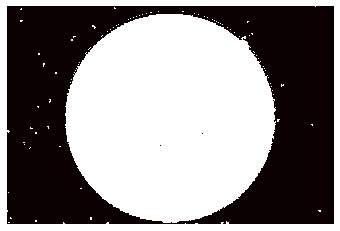

(1944, 2592) float64 



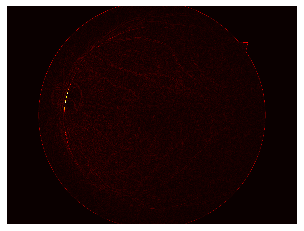

(1944, 2592) float64


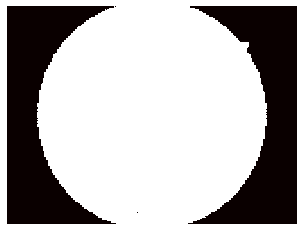

(3264, 4928) float64 



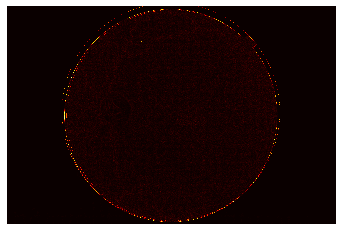

(3264, 4928) float64


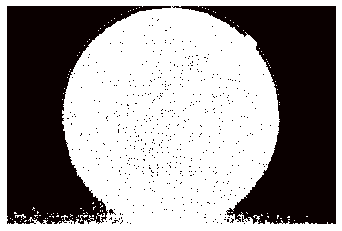

In [17]:
from skimage.filters import sobel


for i in imgs[-3:]:
    
    
    flat = rgb2gray(i)
    print(flat.shape,flat.dtype,"\n")
    
    edges = sobel(flat)
    
    
    plt.figure()
    ipl = plt.imshow(edges)
    ipl.set_cmap('hot')
    plt.axis('off')
    plt.show()
    
    edges = edges[min(),:]
    
    plt.figure()
    ipl = plt.imshow(edges)
    ipl.set_cmap('hot')
    plt.axis('off')
    plt.show()

In [ ]:
# try a maximum projection along the x axis

from skimage.filters import sobel

def closest_divisor(num, divisor):
    for div in range(int(divisor*.75),int(1.25*divisor)):
        if num % div == 0:
            return div
        
       
def sum_chunk(x, chunk_size, axis=-1):
    shape = x.shape
    if axis < 0:
        axis += x.ndim
     
    shape = shape[:axis] + (-1, chunk_size) + shape[axis+1:]
    x = x.reshape(shape)
    return x.sum(axis=axis+1)


        
for i in imgs:
    
    
    flat = rgb2gray(i)
    print(flat.shape,flat.dtype,"\n")
    
    maxproj = flat.sum(axis=0)
    
    plt.figure()
    
    ipl = plt.plot(np.linspace(0,maxproj.shape[-1],maxproj.shape[-1]),maxproj)
    #ipl.set_cmap('hot')
    #plt.axis('off')
    plt.show()
    
    #edges = edges[min(),:]
    
    plt.figure()
    ipl = plt.imshow(i)
    ipl.set_cmap('hot')
    plt.axis('off')
    plt.show()

## 

In [45]:
testme = np.zeros((20))
testme[7:16] = 42
print(np.argmax(testme),np.argmax(testme[::-1]))


7 4


(2592, 3888, 3) (2592, 3888) float64 	 (project onto x)  (3888,) 1257.583325490198 0.0
728 3160


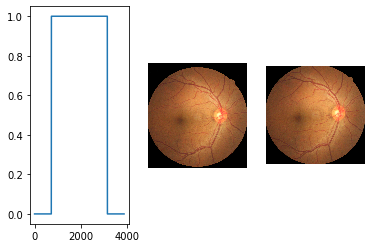

(3264, 4928, 3) (3264, 4928) float64 	 (project onto x)  (4928,) 1585.5894552941131 0.0
871 4041


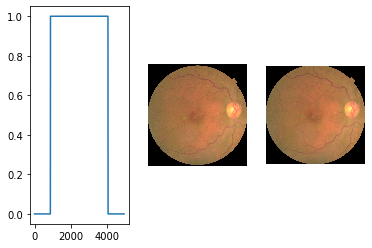

(3168, 4752, 3) (3168, 4752) float64 	 (project onto x)  (4752,) 1576.6885023529499 0.0
861 3811


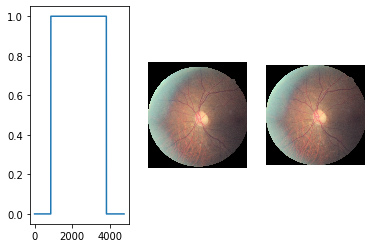

(2592, 3888, 3) (2592, 3888) float64 	 (project onto x)  (3888,) 1649.084918431374 0.0
376 3548


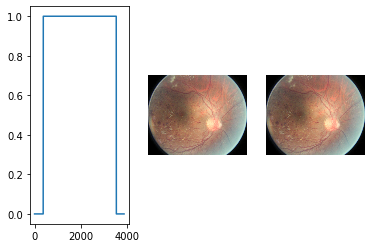

(1944, 2592, 3) (1944, 2592) float64 	 (project onto x)  (2592,) 757.8469427450983 0.0
296 2301


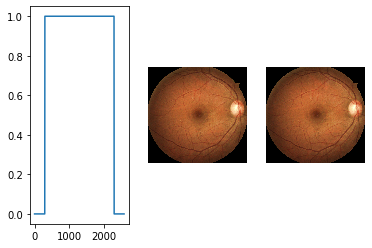

(3168, 4752, 3) (3168, 4752) float64 	 (project onto x)  (4752,) 827.7006768627436 0.0
892 3850


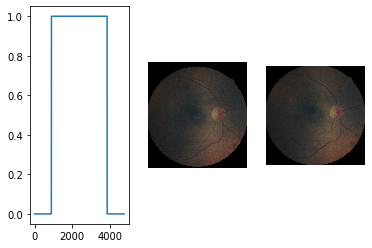

(2592, 3888, 3) (2592, 3888) float64 	 (project onto x)  (3888,) 1553.021366274509 0.7868282352941165
374 3522


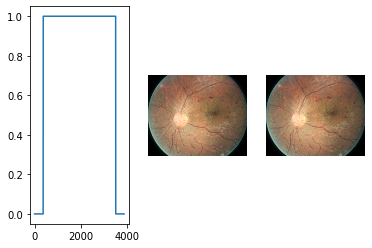

(2592, 3888, 3) (2592, 3888) float64 	 (project onto x)  (3888,) 1069.0020741176445 0.0
721 3150


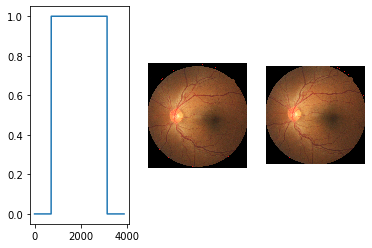

(1944, 2592, 3) (1944, 2592) float64 	 (project onto x)  (2592,) 807.0909635294134 0.0
298 2292


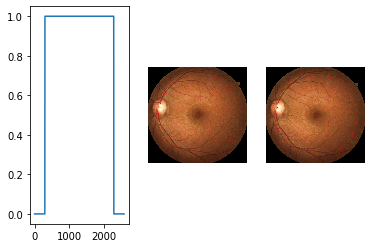

(3264, 4928, 3) (3264, 4928) float64 	 (project onto x)  (4928,) 1522.1417756862775 0.0
870 4038


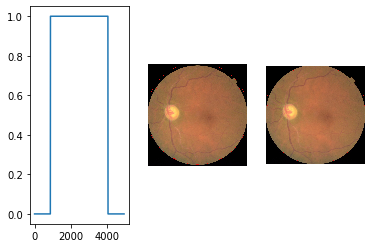

In [61]:
from skimage.color import rgb2gray

def dr_cropped_dims(img, threshold_of_max=.1,axis=-1):
    if axis < 0:
        axis = 0
    flat = rgb2gray(img)
    
    ontox = flat.sum(axis=axis)
    mask = np.where(ontox > .1*np.max(ontox))
    not_mask = np.where(ontox <= .1*np.max(ontox))
    
    ontox[ mask ] = 1
    ontox[ not_mask ] = 0
    
    lox = np.argmax(ontox)
    hix = ontox.shape[0] - np.argmax(ontox[::-1])
    return lox,hix
    
def dr_crop(img, threshold_of_max=.1):
    """assumes a RGB image to come in, crops image to threshold of max"""
    flat = rgb2gray(img)
    # x first
    lox, hix = dr_cropped_dims(img, threshold_of_max,axis=0)
    
    # y second
    loy, hiy = dr_cropped_dims(img, threshold_of_max,axis=1)
    
    return img[loy:hiy,lox:hix,:]
    
    
for i in imgs:
    
    
    flat = rgb2gray(i)
    ontox = flat.sum(axis=0)
    ontoy = flat.sum(axis=1)
    print(i.shape,flat.shape,flat.dtype,"\t (project onto x) ",ontox.shape,np.max(ontox),np.min(ontox))
    
    mask = np.where(ontox > .1*np.max(ontox))
    not_mask = np.where(ontox <= .1*np.max(ontox))
    
    ontox[ mask ] = 1
    ontox[ not_mask ] = 0

    plt.figure()
    plt.subplot(131)
    ipl = plt.plot(ontox)
    
    
    lox = np.argmax(ontox)
    hix = ontox.shape[0] - np.argmax(ontox[::-1])
    print(lox,hix)
    cropped = i[:,lox:hix,:]
    plt.subplot(132)
    ipl = plt.imshow(cropped)
    ipl.set_cmap('hot')
    plt.axis('off')
    
    
    
    tlox, thix = dr_cropped_dims(i,axis=0)
    assert tlox == lox
    assert thix == hix
    plt.subplot(133)
    pl = plt.imshow(dr_crop(i))
    ipl.set_cmap('hot')
    plt.axis('off')
    plt.show()